In [1]:

# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

import cnn_utils as utils
from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
#from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import os

Using TensorFlow backend.


In [3]:

BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 20
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

Number of training samples:  16000
Number of test samples:  4000
number of training examples = 15200
number of test examples = 4000
X_train shape: (15200, 128, 128, 3)
Y_train shape: (15200, 20)
X_test shape: (4000, 128, 128, 3)
Y_test shape: (4000, 20)


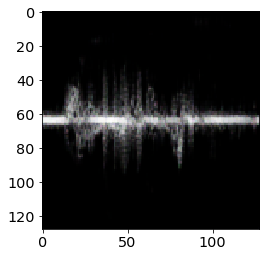

In [4]:
import h5py
hdf5_path = 'wgan_color_20.hdf5' 
#hdf5_path = 'tobb_dataset_128x128.hdf5'
dataset = h5py.File(hdf5_path, "r")



Y_test_orig = np.array(dataset["test_labels"])
Y_train_orig = np.array(dataset["train_labels"])
X_train_orig = np.array(dataset["train_img"])
X_test_orig = np.array(dataset["test_img"])

print('Number of training samples: ', len(X_train_orig))
print('Number of test samples: ', len(X_test_orig))

# Example of a picture
index = 14
plt.imshow(X_train_orig[index])
#print ("y = " + str(np.squeeze(Y_train_orig[index])))


X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  Y_train_orig, 
                                                  test_size=0.05, 
                                                  stratify=np.array(Y_train_orig), 
                                                  random_state=42)


NUM_CLASSES=20;

Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test = np_utils.to_categorical(Y_test_orig, NUM_CLASSES)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Number of training samples:  288
Number of test samples:  360
number of training examples = 244
number of test examples = 360
X_train shape: (244, 128, 128, 3)
Y_train shape: (244, 20)
X_test shape: (360, 128, 128, 3)
Y_test shape: (360, 20)


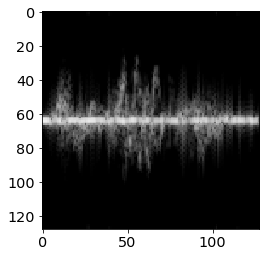

In [5]:
import h5py
hdf5_path = 'Smote_native_all_test.hdf5' 
#hdf5_path = 'tobb_dataset_128x128.hdf5'
dataset = h5py.File(hdf5_path, "r")



Y_test_native = np.array(dataset["test_labels"])
Y_train_native = np.array(dataset["train_labels"])
X_train_native = np.array(dataset["train_img"])
X_test_native = np.array(dataset["test_img"])

print('Number of training samples: ', len(X_train_native))
print('Number of test samples: ', len(X_test_native))

# Example of a picture
index = 14
plt.imshow(X_train_native[index])
#print ("y = " + str(np.squeeze(Y_train_orig[index])))


X_train_N = X_train_native/255.
X_test_N = X_test_native/255.

X_train_N, X_val, y_train_N, y_val = train_test_split(X_train_N, 
                                                  Y_train_native, 
                                                  test_size=0.15, 
                                                  stratify=np.array(Y_train_native), 
                                                  random_state=42)


NUM_CLASSES=20;

Y_train_N = np_utils.to_categorical(y_train_N, NUM_CLASSES)
Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test_N = np_utils.to_categorical(Y_test_native, NUM_CLASSES)
print ("number of training examples = " + str(X_train_N.shape[0]))
print ("number of test examples = " + str(X_test_N.shape[0]))
print ("X_train shape: " + str(X_train_N.shape))
print ("Y_train shape: " + str(Y_train_N.shape))
print ("X_test shape: " + str(X_test_N.shape))
print ("Y_test shape: " + str(Y_test_N.shape))

# Prepare the Model 
    Load VGG16 without the top classification layer 
    Prepare a custom classifier 
    Stack both models on top of each other


In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Or 2, 3, etc. other than 0
base_model = vgg.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [7]:
# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

In [8]:
epochs = [100]
#batch_size = [8,16]
#dense_1 = [64, 64, 128, 128, 256, 256]
#dense_2 = [32, 64, 64, 128, 128, 256]
batch_size = [64]
dense_1 = [64]
dense_2 = [64]
learn_rate = [0.0002]
acc_hist = []
hist_hist = []
drop = [0.55]

for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_1)):
            for m in range(len(learn_rate)):
                for n in range(len(drop)):

                     x = GlobalAveragePooling2D()(last)
                     x = BatchNormalization()(x)
                     x = Dense(dense_1[k], activation='relu')(x)
                     x = Dense(dense_2[k], activation='relu')(x)
                     x = Dropout(drop[n])(x)
                     pred = Dense(NUM_CLASSES, activation='softmax')(x)
                     model = Model(base_model.input, pred)
                     for layer in base_model.layers:
                         layer.trainable = False
                     model.compile(loss='binary_crossentropy',
                                   optimizer=optimizers.Adam(lr=learn_rate[m], decay = 1e-06),
                                             metrics=['categorical_accuracy'])

                     history = model.fit(X_train, Y_train, epochs = epochs[i], validation_data = (X_test_N,Y_test_N),  batch_size = batch_size[j], verbose=1)
                     acc = history.history['categorical_accuracy'][-1]
                     acc_hist.append(acc)
                     hist_hist.append(history.history)
                     print('Params for 77 GHz: epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+
                          ', dense_1= '+str(dense_1[k])+', dense_2= '+str(dense_2[k])+', learn_rate= '+str(learn_rate[m])+
                          ', Accuracy='+str(acc))
                     preds = model.evaluate(X_test_N, Y_test_N)
                     print ("Loss = " + str(preds[0]))
                     print ("Test Accuracy = " + str(preds[1]))

W0910 13:41:42.146636 140136302813312 nn_ops.py:4372] Large dropout rate: 0.55 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 15200 samples, validate on 360 samples
Epoch 1/100
15200/15200 [==============================] - 16s 1ms/step - loss: 0.1836 - categorical_accuracy: 0.1808 - val_loss: 0.1760 - val_categorical_accuracy: 0.2222
Epoch 2/100
15200/15200 [==============================] - 13s 877us/step - loss: 0.1294 - categorical_accuracy: 0.4645 - val_loss: 0.1130 - val_categorical_accuracy: 0.6639
Epoch 3/100
15200/15200 [==============================] - 15s 985us/step - loss: 0.0883 - categorical_accuracy: 0.6650 - val_loss: 0.0770 - val_categorical_accuracy: 0.7889
Epoch 4/100
15200/15200 [==============================] - 15s 985us/step - loss: 0.0590 - categorical_accuracy: 0.7897 - val_loss: 0.0560 - val_categorical_accuracy: 0.8389
Epoch 5/100
15200/15200 [==============================] - 15s 961us/step - loss: 0.0422 - categorical_accuracy: 0.8600 - val_loss: 0.0449 - val_categorical_accuracy: 0.8583
Epoch 6/100
15200/15200 [==============================] - 13s 864us/step - loss: 0.

15200/15200 [==============================] - 13s 850us/step - loss: 0.0017 - categorical_accuracy: 0.9951 - val_loss: 0.0256 - val_categorical_accuracy: 0.9333
Epoch 48/100
15200/15200 [==============================] - 14s 897us/step - loss: 0.0015 - categorical_accuracy: 0.9956 - val_loss: 0.0241 - val_categorical_accuracy: 0.9333
Epoch 49/100
15200/15200 [==============================] - 15s 960us/step - loss: 0.0014 - categorical_accuracy: 0.9964 - val_loss: 0.0261 - val_categorical_accuracy: 0.9222
Epoch 50/100
15200/15200 [==============================] - 15s 965us/step - loss: 0.0014 - categorical_accuracy: 0.9959 - val_loss: 0.0271 - val_categorical_accuracy: 0.9167
Epoch 51/100
15200/15200 [==============================] - 14s 925us/step - loss: 0.0016 - categorical_accuracy: 0.9944 - val_loss: 0.0242 - val_categorical_accuracy: 0.9306
Epoch 52/100
15200/15200 [==============================] - 14s 896us/step - loss: 0.0014 - categorical_accuracy: 0.9963 - val_loss: 0.023

15200/15200 [==============================] - 13s 846us/step - loss: 7.3758e-04 - categorical_accuracy: 0.9978 - val_loss: 0.0291 - val_categorical_accuracy: 0.9333
Epoch 94/100
15200/15200 [==============================] - 12s 813us/step - loss: 6.5508e-04 - categorical_accuracy: 0.9979 - val_loss: 0.0281 - val_categorical_accuracy: 0.9417
Epoch 95/100
15200/15200 [==============================] - 12s 808us/step - loss: 6.0278e-04 - categorical_accuracy: 0.9984 - val_loss: 0.0297 - val_categorical_accuracy: 0.9389
Epoch 96/100
15200/15200 [==============================] - 12s 779us/step - loss: 6.2372e-04 - categorical_accuracy: 0.9978 - val_loss: 0.0324 - val_categorical_accuracy: 0.9333
Epoch 97/100
15200/15200 [==============================] - 12s 774us/step - loss: 6.0068e-04 - categorical_accuracy: 0.9981 - val_loss: 0.0297 - val_categorical_accuracy: 0.9417
Epoch 98/100
15200/15200 [==============================] - 13s 837us/step - loss: 7.2482e-04 - categorical_accuracy: 

In [9]:
preds = model.evaluate(X_test_N, Y_test_N)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

360/360 [==============================] - 0s 707us/step
Loss = 0.026343465803398025
Test Accuracy = 0.9388889074325562


In [10]:
from sklearn.metrics import confusion_matrix

tt= model.predict(X_test_N)
cm=confusion_matrix(np.argmax(Y_test_N,axis=1), np.argmax(tt,axis=1))
print(cm)

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  8  0  1  8  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  5  0  0  0  0 11  0  0